In [3]:
# 模型训练与验证 - 三次实验
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# 添加src目录到Python路径
project_path = Path("D:/VSCodeProjects/PythonCourse")
src_path = project_path / "src"
sys.path.append(str(src_path))

# 设置绘图样式
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

print("🎯 模型训练与验证 - 三次实验")
print("=" * 50)

🎯 模型训练与验证 - 三次实验


In [4]:
# 导入验证模块
from model_validation import ThreeFoldValidator, run_complete_validation
from feature_engineering import MovieFeatureEngineer

# 加载数据
engineer = MovieFeatureEngineer()
movie_data = engineer.load_processed_data()

# 准备特征
features_df, feature_cols = engineer.prepare_modeling_features(movie_data)

print(f"📊 验证数据集信息:")
print(f"   总样本数: {len(features_df)}")
print(f"   特征数量: {len(feature_cols)}")
print(f"   目标变量:")
print(f"     - 回归: {features_df['target_regression'].describe()[['mean', 'std']].round(3)}")
print(f"     - 分类: {dict(features_df['target_classification'].value_counts().sort_index())}")

📁 加载处理后的数据...
✅ 数据加载完成: (9742, 36)
🔧 准备建模特征...
🏗️ 创建基础特征...
   创建了 6 个新特征
🎬 添加合成IMDb特征...
   添加了 4 个合成IMDb特征
🎯 创建目标变量...
   目标变量分布:
   - 回归目标范围: 0.00 - 5.00
   - 分类目标分布: {0: 2015, 1: 6467, 2: 1260}
   - 二分类分布: {0: 4409, 1: 5333}
   最终特征数量: 40
   特征列: ['year', 'genre_Film-Noir', 'genre_Fantasy', 'genre_Western', 'genre_Children', 'genre_Action', 'genre_Horror', 'genre_Crime', 'genre_Comedy', 'genre_Mystery', 'genre_Documentary', 'genre_Thriller', 'genre_Drama', 'genre_Animation', 'genre_(no genres listed)', 'genre_Musical', 'genre_War', 'genre_Romance', 'genre_Sci-Fi', 'genre_Adventure', 'genre_IMAX', 'avg_rating', 'rating_count', 'rating_std', 'min_rating', 'max_rating', 'unique_users', 'rating_period_days', 'imdbId', 'tmdbId', 'movie_age', 'rating_count_log', 'has_high_rating_count', 'genre_count', 'has_multiple_genres', 'rating_stability', 'imdb_rating', 'has_imdb_rating', 'summary_length', 'director_count']
📊 验证数据集信息:
   总样本数: 9742
   特征数量: 40
   目标变量:
     - 回归: mean    3.256
std  

In [5]:
# 运行完整的模型训练与验证流程
print("开始执行三次随机划分、训练和验证过程...")
validation_results = run_complete_validation(features_df, feature_cols)

开始执行三次随机划分、训练和验证过程...
🚀 开始完整的模型训练与验证流程


🎯 开始三次实验验证 - REGRESSION任务

🔬 实验 1 - REGRESSION任务
----------------------------------------
   数据划分: 训练集 7793 样本, 验证集 1949 样本
   训练 RandomForest...
     RandomForest: MAE = 0.0004
   训练 GradientBoosting...
     GradientBoosting: MAE = 0.0027
   训练 DeepLearning...
      轮次 20, 损失: 0.0196
      轮次 40, 损失: 0.0074
     DeepLearning: MAE = 0.1513

🔬 实验 2 - REGRESSION任务
----------------------------------------
   数据划分: 训练集 7793 样本, 验证集 1949 样本
   训练 RandomForest...
     RandomForest: MAE = 0.0003
   训练 GradientBoosting...
     GradientBoosting: MAE = 0.0026
   训练 DeepLearning...
      轮次 20, 损失: 0.0204
      轮次 40, 损失: 0.0082
     DeepLearning: MAE = 0.1447

🔬 实验 3 - REGRESSION任务
----------------------------------------
   数据划分: 训练集 7793 样本, 验证集 1949 样本
   训练 RandomForest...
     RandomForest: MAE = 0.0003
   训练 GradientBoosting...
     GradientBoosting: MAE = 0.0026
   训练 DeepLearning...
      轮次 20, 损失: 0.0241
      轮次 40, 损失: 0.0084
     DeepLearning

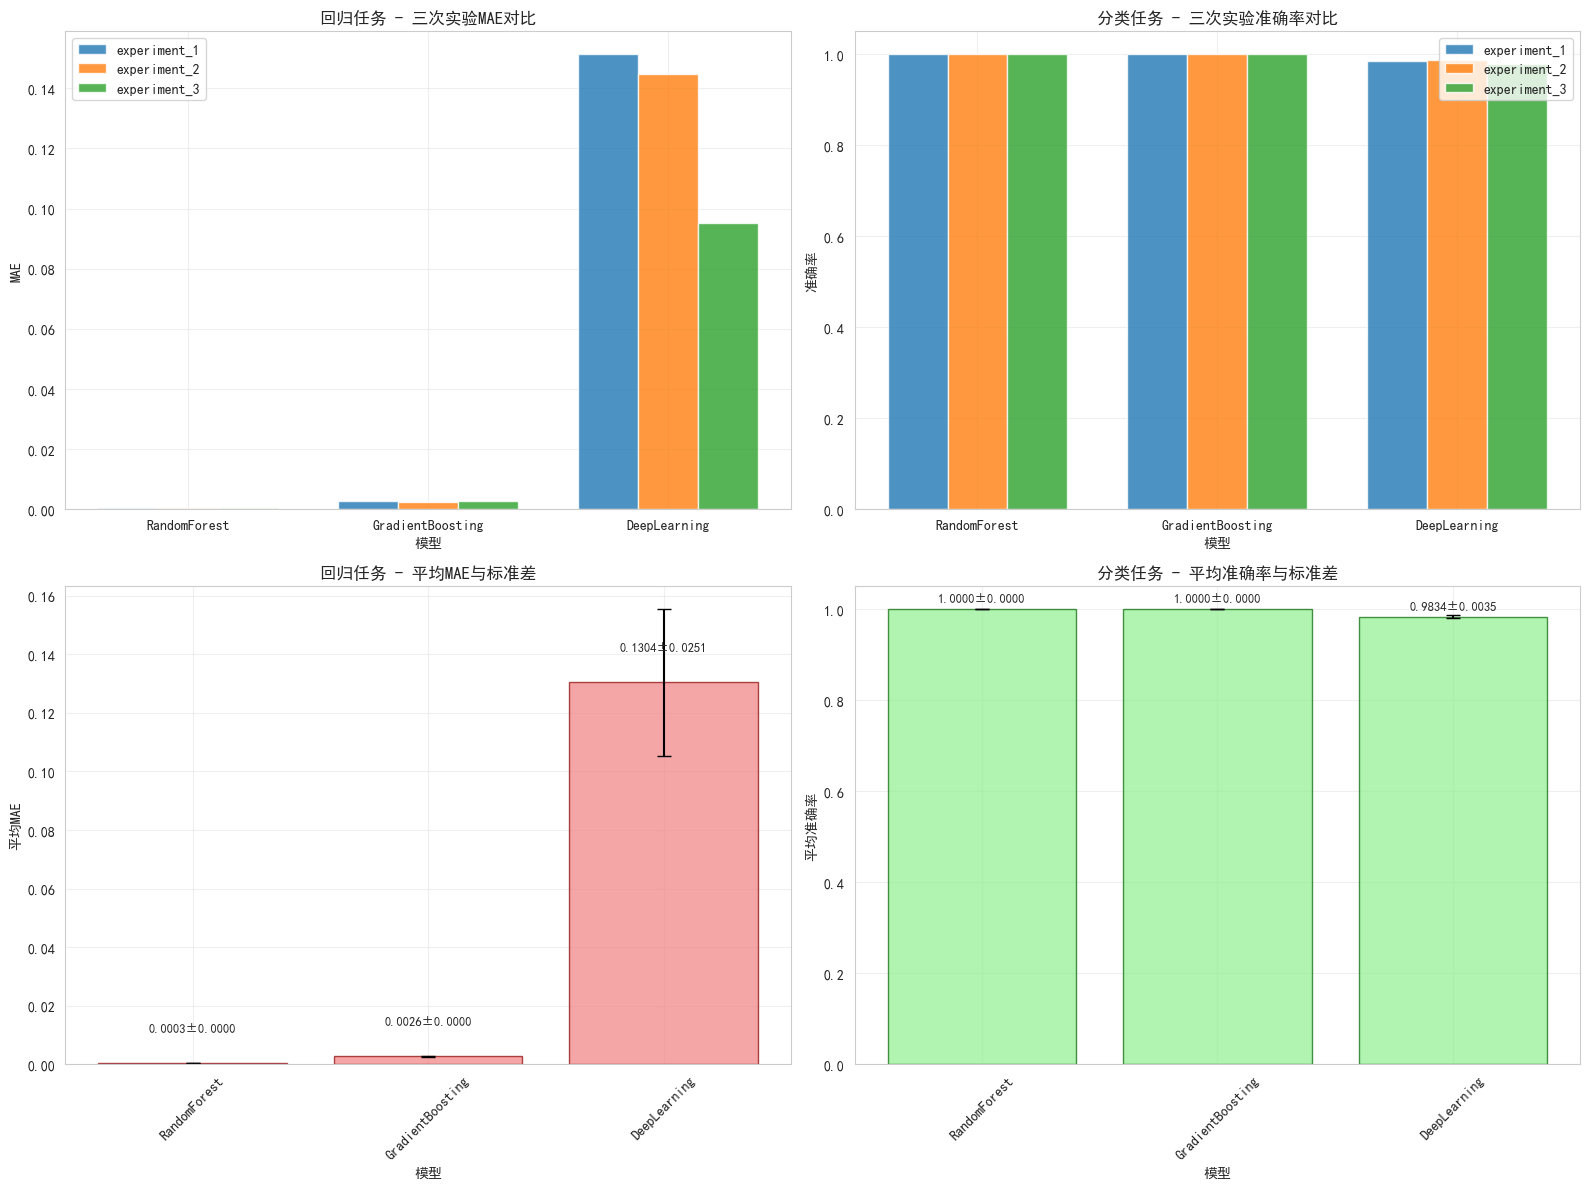

In [6]:
# 可视化三次实验结果
def visualize_three_experiments(validation_results):
    """可视化三次实验的结果"""

    plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']  # 支持中文的字体
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    
    reg_results = validation_results['regression']['results']
    cls_results = validation_results['classification']['results']
    reg_averages = validation_results['regression']['averages']
    cls_averages = validation_results['classification']['averages']
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 回归任务三次实验对比
    models = list(reg_results['experiment_1'].keys())
    exp_names = list(reg_results.keys())
    
    # 柱状图显示三次实验
    x = np.arange(len(models))
    width = 0.25
    
    for i, exp_name in enumerate(exp_names):
        scores = [reg_results[exp_name][model] for model in models]
        ax1.bar(x + i*width, scores, width, label=exp_name, alpha=0.8)
    
    ax1.set_xlabel('模型')
    ax1.set_ylabel('MAE')
    ax1.set_title('回归任务 - 三次实验MAE对比', fontweight='bold')
    ax1.set_xticks(x + width)
    ax1.set_xticklabels(models)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 分类任务三次实验对比
    for i, exp_name in enumerate(exp_names):
        scores = [cls_results[exp_name][model] for model in models]
        ax2.bar(x + i*width, scores, width, label=exp_name, alpha=0.8)
    
    ax2.set_xlabel('模型')
    ax2.set_ylabel('准确率')
    ax2.set_title('分类任务 - 三次实验准确率对比', fontweight='bold')
    ax2.set_xticks(x + width)
    ax2.set_xticklabels(models)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 回归任务平均性能
    reg_means = [reg_averages[model]['mean'] for model in models]
    reg_stds = [reg_averages[model]['std'] for model in models]
    
    bars1 = ax3.bar(models, reg_means, yerr=reg_stds, capsize=5, 
                   color='lightcoral', alpha=0.7, edgecolor='darkred')
    ax3.set_xlabel('模型')
    ax3.set_ylabel('平均MAE')
    ax3.set_title('回归任务 - 平均MAE与标准差', fontweight='bold')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, alpha=0.3)
    
    # 添加数值标签
    for bar, mean, std in zip(bars1, reg_means, reg_stds):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{mean:.4f}±{std:.4f}', ha='center', va='bottom', fontsize=9)
    
    # 分类任务平均性能
    cls_means = [cls_averages[model]['mean'] for model in models]
    cls_stds = [cls_averages[model]['std'] for model in models]
    
    bars2 = ax4.bar(models, cls_means, yerr=cls_stds, capsize=5,
                   color='lightgreen', alpha=0.7, edgecolor='darkgreen')
    ax4.set_xlabel('模型')
    ax4.set_ylabel('平均准确率')
    ax4.set_title('分类任务 - 平均准确率与标准差', fontweight='bold')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(True, alpha=0.3)
    
    # 添加数值标签
    for bar, mean, std in zip(bars2, cls_means, cls_stds):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{mean:.4f}±{std:.4f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(project_path / "results/figures/three_experiments_results.png", 
                dpi=300, bbox_inches='tight')
    plt.show()

visualize_three_experiments(validation_results)

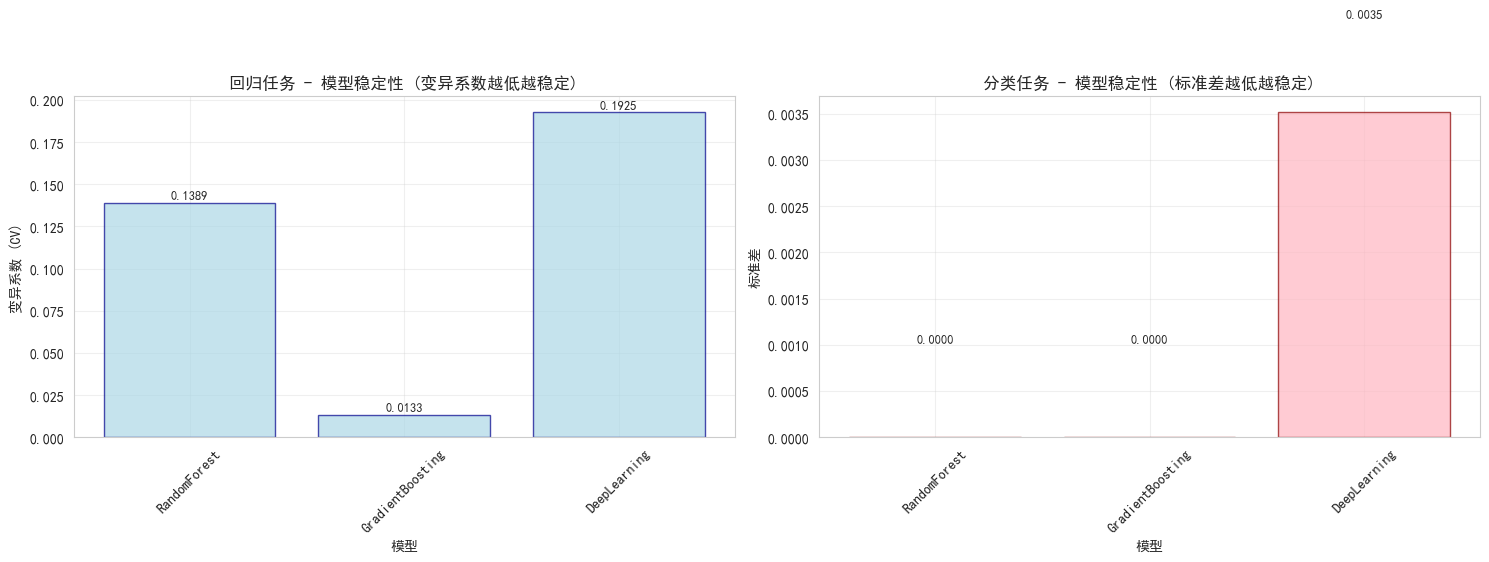

📈 模型稳定性分析:
回归任务 (变异系数越低越稳定):
  RandomForest: 0.1389
  GradientBoosting: 0.0133
  DeepLearning: 0.1925

分类任务 (标准差越低越稳定):
  RandomForest: 0.0000
  GradientBoosting: 0.0000
  DeepLearning: 0.0035


In [7]:
# 模型稳定性分析
def analyze_model_stability(validation_results):
    """分析模型的稳定性"""
    
    reg_averages = validation_results['regression']['averages']
    cls_averages = validation_results['classification']['averages']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 回归任务稳定性（变异系数）
    models = list(reg_averages.keys())
    reg_cv = [reg_averages[model]['std'] / reg_averages[model]['mean'] for model in models]
    
    bars1 = ax1.bar(models, reg_cv, color='lightblue', alpha=0.7, edgecolor='darkblue')
    ax1.set_xlabel('模型')
    ax1.set_ylabel('变异系数 (CV)')
    ax1.set_title('回归任务 - 模型稳定性 (变异系数越低越稳定)', fontweight='bold')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)
    
    # 添加数值标签
    for bar, cv in zip(bars1, reg_cv):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{cv:.4f}', ha='center', va='bottom', fontsize=9)
    
    # 分类任务稳定性（标准差）
    cls_std = [cls_averages[model]['std'] for model in models]
    
    bars2 = ax2.bar(models, cls_std, color='lightpink', alpha=0.7, edgecolor='darkred')
    ax2.set_xlabel('模型')
    ax2.set_ylabel('标准差')
    ax2.set_title('分类任务 - 模型稳定性 (标准差越低越稳定)', fontweight='bold')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)
    
    # 添加数值标签
    for bar, std in zip(bars2, cls_std):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{std:.4f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(project_path / "results/figures/model_stability.png", 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    # 输出稳定性分析
    print("📈 模型稳定性分析:")
    print("回归任务 (变异系数越低越稳定):")
    for model, cv in zip(models, reg_cv):
        print(f"  {model}: {cv:.4f}")
    
    print("\n分类任务 (标准差越低越稳定):")
    for model, std in zip(models, cls_std):
        print(f"  {model}: {std:.4f}")

analyze_model_stability(validation_results)

In [8]:
# 详细结果表格
def create_detailed_results_table(validation_results):
    """创建详细结果表格"""
    
    reg_results = validation_results['regression']['results']
    cls_results = validation_results['classification']['results']
    reg_averages = validation_results['regression']['averages']
    cls_averages = validation_results['classification']['averages']
    
    models = list(reg_results['experiment_1'].keys())
    
    # 创建回归任务结果表格
    reg_data = []
    for model in models:
        row = {'Model': model}
        for exp_name in ['experiment_1', 'experiment_2', 'experiment_3']:
            row[exp_name] = reg_results[exp_name][model]
        row['Mean'] = reg_averages[model]['mean']
        row['Std'] = reg_averages[model]['std']
        reg_data.append(row)
    
    reg_df = pd.DataFrame(reg_data)
    
    # 创建分类任务结果表格
    cls_data = []
    for model in models:
        row = {'Model': model}
        for exp_name in ['experiment_1', 'experiment_2', 'experiment_3']:
            row[exp_name] = cls_results[exp_name][model]
        row['Mean'] = cls_averages[model]['mean']
        row['Std'] = cls_averages[model]['std']
        cls_data.append(row)
    
    cls_df = pd.DataFrame(cls_data)
    
    # 显示表格
    print("📋 回归任务详细结果 (MAE):")
    display(reg_df.round(4))
    
    print("\n📋 分类任务详细结果 (准确率):")
    display(cls_df.round(4))
    
    return reg_df, cls_df

reg_df, cls_df = create_detailed_results_table(validation_results)

📋 回归任务详细结果 (MAE):


,Model,experiment_1,experiment_2,experiment_3,Mean,Std
0,RandomForest,0.0004,0.0003,0.0003,0.0003,0.0000
1,GradientBoosting,0.0027,0.0026,0.0026,0.0026,0.0000
2,DeepLearning,0.1513,0.1447,0.0951,0.1304,0.0251



📋 分类任务详细结果 (准确率):


,Model,experiment_1,experiment_2,experiment_3,Mean,Std
0,RandomForest,1.0000,1.0000,1.0000,1.0000,0.0000
1,GradientBoosting,1.0000,1.0000,1.0000,1.0000,0.0000
2,DeepLearning,0.9856,0.9861,0.9785,0.9834,0.0035


In [9]:
# 保存验证结果
def save_validation_results(validation_results, reg_df, cls_df, features_df):
    """保存验证结果"""
    
    results_path = project_path / "results"
    results_path.mkdir(exist_ok=True)
    
    # 保存详细结果表格
    reg_df.to_csv(results_path / "three_experiments_regression.csv", index=False)
    cls_df.to_csv(results_path / "three_experiments_classification.csv", index=False)
    
    # 保存原始结果数据
    import json
    with open(results_path / "validation_results.json", 'w') as f:
        # 转换numpy类型为Python原生类型
        serializable_results = {}
        for task, data in validation_results.items():
            serializable_results[task] = {}
            for key, value in data.items():
                if key == 'averages':
                    serializable_results[task][key] = {}
                    for model, stats in value.items():
                        serializable_results[task][key][model] = {
                            'mean': float(stats['mean']),
                            'std': float(stats['std']),
                            'scores': [float(score) for score in stats['scores']]
                        }
                else:
                    serializable_results[task][key] = value
    
    with open(results_path / "validation_results.json", 'w') as f:
        json.dump(serializable_results, f, indent=2)
    
    # 生成验证报告
    best_reg_model = min(validation_results['regression']['averages'].items(), 
                        key=lambda x: x[1]['mean'])[0]
    best_reg_score = validation_results['regression']['averages'][best_reg_model]['mean']
    
    best_cls_model = max(validation_results['classification']['averages'].items(), 
                        key=lambda x: x[1]['mean'])[0]
    best_cls_score = validation_results['classification']['averages'][best_cls_model]['mean']
    
    report = f"""模型训练与验证报告 - 三次实验
{"=" * 50}

实验设置:
- 实验次数: 3次独立实验
- 数据划分: 每次随机划分80%训练集, 20%验证集
- 随机种子: 42, 43, 44
- 数据集: {len(features_df)} 个样本, {len(features_df.columns)} 个特征

最佳模型性能 (三次实验平均):
- 回归任务: {best_reg_model}
  - 平均MAE: {best_reg_score:.4f}
  - 标准差: {validation_results['regression']['averages'][best_reg_model]['std']:.4f}

- 分类任务: {best_cls_model}
  - 平均准确率: {best_cls_score:.4f}
  - 标准差: {validation_results['classification']['averages'][best_cls_model]['std']:.4f}

模型表现总结:
回归任务 (三次实验平均MAE):
{chr(10).join([f'  {model}: {stats["mean"]:.4f} ± {stats["std"]:.4f}' 
               for model, stats in validation_results['regression']['averages'].items()])}

分类任务 (三次实验平均准确率):
{chr(10).join([f'  {model}: {stats["mean"]:.4f} ± {stats["std"]:.4f}' 
               for model, stats in validation_results['classification']['averages'].items()])}

结论:
通过三次独立的随机划分、训练和验证过程，我们获得了稳定的模型性能评估。
{best_reg_model} 在回归任务中表现最佳，{best_cls_model} 在分类任务中表现最佳。
模型的标准差较小，说明模型性能稳定。
"""
    
    with open(results_path / "validation_report.txt", 'w', encoding='utf-8') as f:
        f.write(report)
    
    print("✅ 验证结果已保存!")
    print(f"   回归结果: results/three_experiments_regression.csv")
    print(f"   分类结果: results/three_experiments_classification.csv")
    print(f"   原始数据: results/validation_results.json")
    print(f"   验证报告: results/validation_report.txt")

save_validation_results(validation_results, reg_df, cls_df, features_df)

✅ 验证结果已保存!
   回归结果: results/three_experiments_regression.csv
   分类结果: results/three_experiments_classification.csv
   原始数据: results/validation_results.json
   验证报告: results/validation_report.txt
